In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.DataFrame({
    'user_id':   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'banner':     [101, 102, 101, 103, 102, 101, 103, 104, 102, 101],
    'displays': [10, 20, 3, 5, 12, 23, 6, 9, 12, 20],
    'clicks': [4, 0, 3, 1, 0, 7, 4, 6, 8, 10],
    'channel': ['web', 'mobile', 'web', 'web', 'mobile', 'web', 'mobile', 'web', 'mobile', 'web']
})
df

,user_id,banner,displays,clicks,channel
0,1,101,10,4,web
1,2,102,20,0,mobile
2,3,101,3,3,web
3,4,103,5,1,web
4,5,102,12,0,mobile
5,6,101,23,7,web
6,7,103,6,4,mobile
7,8,104,9,6,web
8,9,102,12,8,mobile
9,10,101,20,10,web


Based on the provided dataset, find out:
1) What banner is the most effective?
2) What banner is the least effective?
3) What channel is the most effective?
4) What banner was the most effective for each channel?
5) Draw bar-plot showing distribution across channels and banners.

# 1. What banner is the most effective? The one with more clicks.
# 2. What banner is the least effective? The one with less clicks.
# Pivot_table and sort_values could help us find out.

In [3]:
pd.pivot_table(data = df, index = 'banner', values = 'clicks',
               aggfunc = 'sum').sort_values(by = 'clicks', ascending = False)

,clicks
banner,
101,24
102,8
104,6
103,5


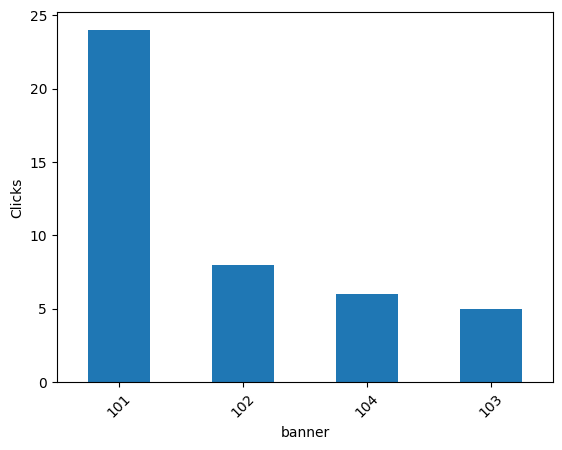

In [4]:
#Let's visualize data and confirm that 101 is most effective, 103 is least effective:
ax = df.groupby('banner')['clicks'].sum().sort_values(ascending = False).plot.bar()
ax.set_ylabel('Clicks')
ax.tick_params(axis = 'x', rotation = 45)

In [5]:
#Finally, let's use idxmax and answer what banner is most effective and what is least effective:
most_effective_banner = df.groupby('banner')['clicks'].sum().idxmax()
max_num_clicks = df.groupby('banner')['clicks'].sum().max()
least_effective_banner = df.groupby('banner')['clicks'].sum().idxmin()
min_num_clicks = df.groupby('banner')['clicks'].sum().min()
print(f"The most effctive banner is {most_effective_banner} with the number of clicks {max_num_clicks}.")
print(f"The least effctive banner is {least_effective_banner} with the number of clicks {min_num_clicks}.")

The most effctive banner is 101 with the number of clicks 24.
The least effctive banner is 103 with the number of clicks 5.


In [6]:
# 3. What channel is the most effective? The one with more clicks.
# 4. What banner was the most effective for each channel? The one that brought more clicks.
df.groupby('channel')['clicks'].sum().sort_values(ascending = False)

channel
web       31
mobile    12
Name: clicks, dtype: int64

In [7]:
#So, web is the most effective channel with 31 clicks, against mobile 12.
#But what banner is the most effective for each channel? Let's see:
df.groupby(['banner', 'channel'])['clicks'].sum()

banner  channel
101     web        24
102     mobile      8
103     mobile      4
        web         1
104     web         6
Name: clicks, dtype: int64

In [8]:
#Let's print the answer:
channel_with_more_clicks_in_banner = (
    df.groupby(['banner', 'channel'])['clicks'].sum().groupby('banner').idxmax()
)
channel_with_more_clicks_in_banner

banner
101       (101, web)
102    (102, mobile)
103    (103, mobile)
104       (104, web)
Name: clicks, dtype: object

In [9]:
#Let's make the answer abundantly clear:
for banner, channel in channel_with_more_clicks_in_banner:
    print(f"Banner {banner} is the most effective for channel '{channel}'")

Banner 101 is the most effective for channel 'web'
Banner 102 is the most effective for channel 'mobile'
Banner 103 is the most effective for channel 'mobile'
Banner 104 is the most effective for channel 'web'


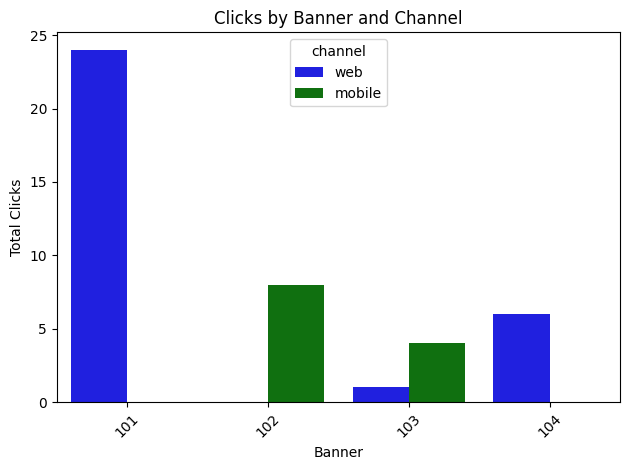

In [10]:
# 5. Draw bar-plot showing distribution across channels and banners.
import matplotlib.pyplot as plt
import seaborn as sns
plot_data = df.groupby(['banner', 'channel'])['clicks'].sum().reset_index()
sns.barplot(data = plot_data, x = 'banner', y = 'clicks', hue = 'channel', palette = {'web': 'blue', 'mobile': 'green'})
plt.xlabel('Banner')
plt.ylabel('Total Clicks')
plt.title('Clicks by Banner and Channel')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()